In [1]:
# Importing necessary Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#Importing input data
train=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
df_train=pd.DataFrame(train)

# Overview of the dataset

In [3]:
df_train.shape

(303, 14)

In [4]:
df_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


** Dataset Description:** 
* age : Age of the patient 
* sex : Sex of the patient 
* cp : Chest Pain 
* trtbps : resting blood pressure (in mm Hg) 
* chol : cholestoral in mg/dl 
* fbs : fasting blood sugar 
* restecg : resting electrocardiographic results 
* thalachh : Maximum heart rate exang: exercise induced angina 
* oldpeak : Previous peak slp : Slope caa: number of major vessels 
* output : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
for i in df_train.columns:
    print(f'total unique values for {i} column is: {df_train[i].value_counts().count()}')

total unique values for age column is: 41
total unique values for sex column is: 2
total unique values for cp column is: 4
total unique values for trtbps column is: 49
total unique values for chol column is: 152
total unique values for fbs column is: 2
total unique values for restecg column is: 3
total unique values for thalachh column is: 91
total unique values for exng column is: 2
total unique values for oldpeak column is: 40
total unique values for slp column is: 3
total unique values for caa column is: 5
total unique values for thall column is: 4
total unique values for output column is: 2


**We can divide the column into categorical and numerical valued columns from above information**

In [7]:
cat=['thall','caa','slp','exng','restecg','fbs','cp','sex']
num=['age','thalachh','chol','trtbps']

Text(0.5, 1.0, 'Correlation between Columns')

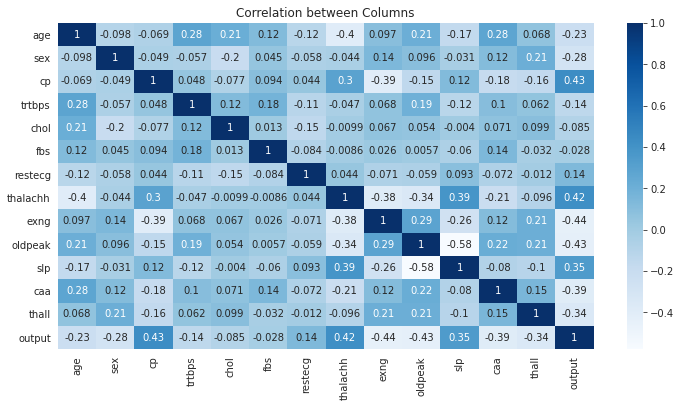

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.corr(),annot=True,cmap='Blues')
plt.title('Correlation between Columns')

In [9]:
# Simple function for ploting the graphs
def ploting_graph(cat):
    for i in cat:
        plt.figure(figsize=(8,5))
        sns.barplot(x=i,y='output',data=df_train)
        plt.title(f'{i} vs Output')

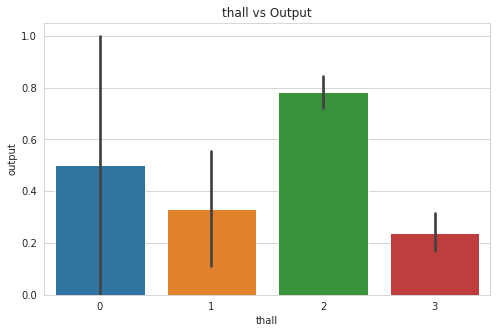

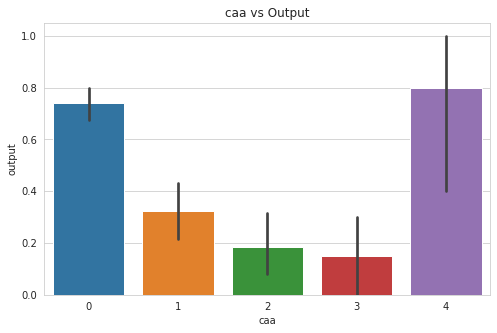

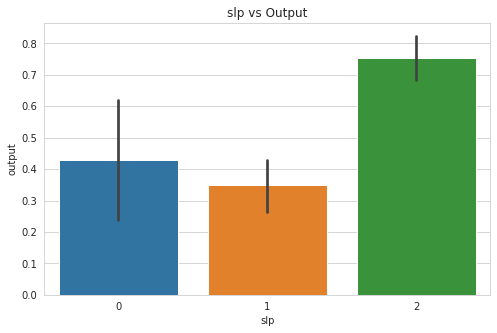

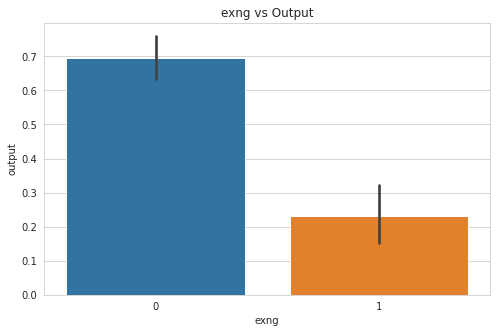

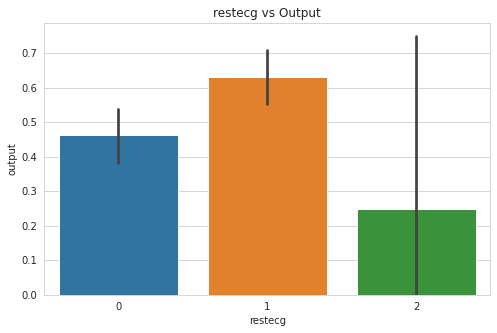

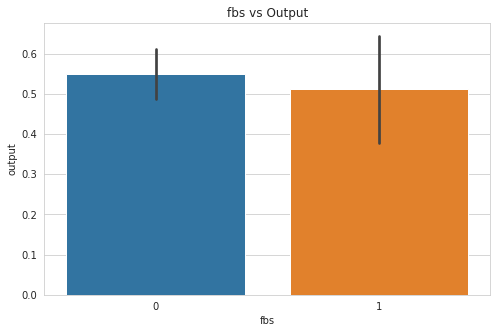

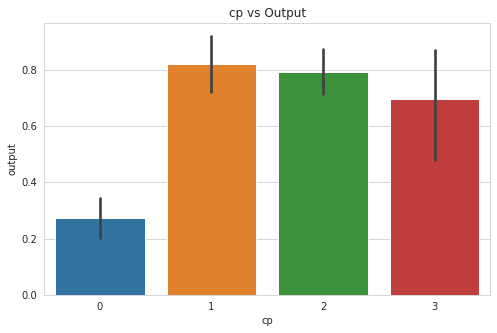

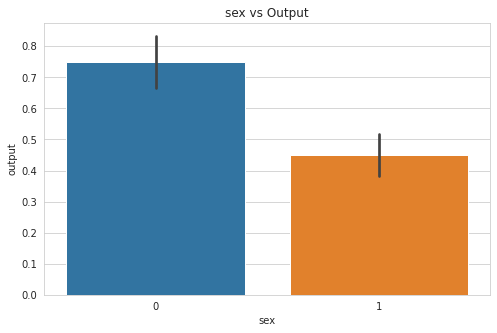

In [10]:
ploting_graph(cat)

**From the above graphs we can say that the fbs column which is fasting blood sugar does not really give us clear indication of the heart attack. We will drop this column in our training set.**

# Label Encoding: binning_column

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
for i in num:
    df_train[i]=pd.cut(df_train[i].astype(int),4)
    df_train[i]=le.fit_transform(df_train[i])

**We are adding two columns 'chol' and 'trtbps' to create a new column named 'bpchol'**

In [13]:
df_train['bpchol']=df_train['chol']+df_train['trtbps']

**We are droping four columns including 'output' column. 'chol' and 'trtbps' columns are dropped because we have a new column with their values. The reason for dropping 'fbs' has already been discussed.**

In [14]:
drop_column=['chol','trtbps','fbs','output']

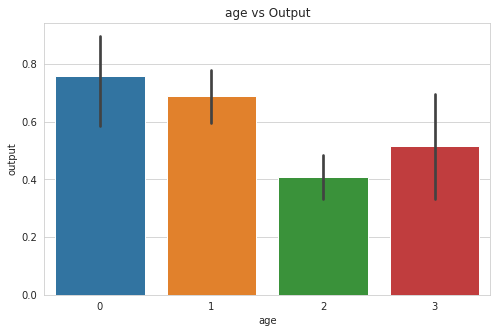

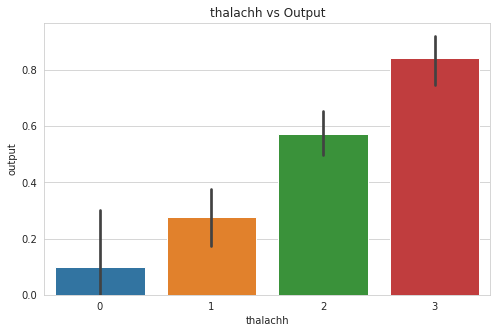

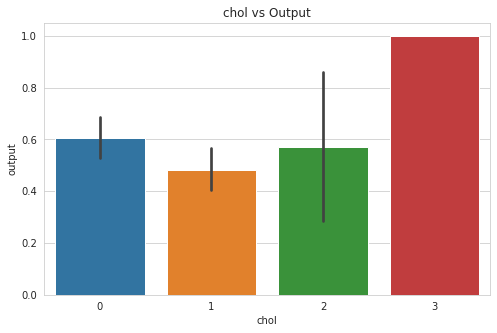

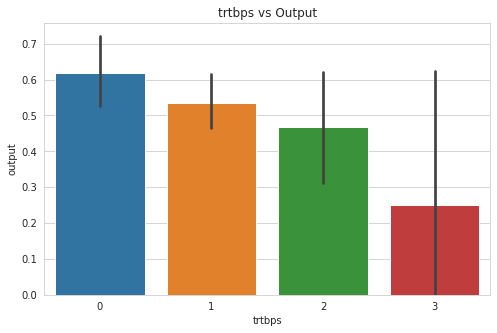

In [15]:
# Plotting graphs after binning and label-encoding those numerical columns
ploting_graph(num)

**Splitting 'output' column(which we will be predicting) from the dataset.**

In [16]:
df_y=df_train['output']
df_train.drop(drop_column,axis=1,inplace=True)

In [17]:
df_train.head()

,age,sex,cp,restecg,thalachh,exng,oldpeak,slp,caa,thall,bpchol
0,2,1,3,0,2,0,2.3,0,0,1,1
1,0,1,2,1,3,0,3.5,0,0,2,2
2,0,0,1,0,3,0,1.4,2,0,2,1
3,2,1,1,1,3,0,0.8,2,0,2,1
4,2,0,0,1,2,1,0.6,2,0,2,2


# Training Model
**Importing libraries for Model creating, testing and predicting**

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

**Standard Scaling all the columns before splitting into test and train sets.**

In [19]:
ss=StandardScaler()
scale_train=ss.fit_transform(df_train)
df_scaled_train=pd.DataFrame(scale_train,columns=df_train.columns)

**Splitting train and test sets. (80/20)**

In [20]:
X_train, X_test, y_train, y_test=train_test_split(df_scaled_train, df_y, test_size=0.2, random_state=42)

In [21]:
X_train.shape

(242, 11)

In [22]:
#A dictionary of ML Models for cross-validating results of different algorithms.
# This Dictonary is adapted from the link: https://www.kaggle.com/rashikrahmanpritom/heart-attack-prediction?rvi=1&scriptVersionId=57435788&cellId=14
model_list = {  
    'KNeighborsClassifier': { 
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [2,3,4,5,6,7,18,19,20],
            'algorithm' : ['auto','ball_tree'],
            'weights' : ['uniform','distance'],
            'leaf_size' : [27,28,29,30,31]
        }
    },
    
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth' : [None,1,2,6,5]
        }
    },
     
    
     'LOGISTIC_REGRESSION': {
        'model': LogisticRegression(),
        'params': {
            'C': [1,2,3,4,5,6,7],
            'solver' : [ 'liblinear', 'lbfgs'],
            'multi_class' : ['auto', 'ovr' ]
        }
    },
    
        
    'SVM': {
        'model': SVC(),
        'params': {
             'C': [1,2,3,5,6,7],
             'kernel': ['rbf','linear'],
             'gamma': ['auto', 'scale']
        }
    },
       
    'RANDOM_FOREST':{
        'model' : RandomForestClassifier(),
        'params': {
            'n_estimators':[1,2,3,4,5,10,15],
            'criterion': ['entropy'],
            'random_state' : [12,13],
            'max_depth' : [5,6]

        }
    }
}

In [23]:
for model_name, mp in model_list.items():
    print(f'model_name: {model_name}')
    clf = GridSearchCV(mp['model'], mp['params'], cv=15)
    clf.fit(X_train,y_train)
    print(f'Best score:{clf.best_score_}')
    print(f'Best parameters:{clf.best_params_}\n\n')

model_name: KNeighborsClassifier
Best score:0.8308823529411764
Best parameters:{'algorithm': 'auto', 'leaf_size': 27, 'n_neighbors': 19, 'weights': 'uniform'}


model_name: DecisionTreeClassifier
Best score:0.8026960784313726
Best parameters:{'criterion': 'gini', 'max_depth': 5}


model_name: LOGISTIC_REGRESSION
Best score:0.8392156862745098
Best parameters:{'C': 4, 'multi_class': 'auto', 'solver': 'liblinear'}


model_name: SVM
Best score:0.8514705882352941
Best parameters:{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


model_name: RANDOM_FOREST
Best score:0.8348039215686274
Best parameters:{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 15, 'random_state': 13}




**As SVM shows most promising result. We will go and predict the output with this one.**

In [24]:
svm=SVC(C=1, gamma='auto', kernel='rbf')
svm.fit(X_train,y_train)
predict=svm.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



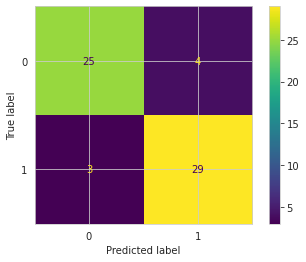

In [25]:
plot_confusion_matrix(svm,X_test,y_test,cmap='viridis')
plt.show()

In [26]:
# Thank you all for your patience. I am new to ML. Hope, this will help some beginners like me.